### Spam v/s No-spam (ham) comparison with different vectorization techniques

**Author: Abhishek Dey**


**Problem Statement:** Considering SVM classifier, compare the performance with BOW, N-Gram and TDF vectorization techniques on spam-ham classification task

### Import Libraries

In [27]:
# text preprocessing

from textacy import preprocessing as tp
import emoji
import contractions
import string

# tokenization & stop words

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# BOW, N-gram, TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# SVM Classifier

from sklearn.svm import LinearSVC

# Train - Test split

from sklearn.model_selection import train_test_split

# Scoring Metric

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matplotlib

import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to /home/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/abhishek/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abhishek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load data

In [28]:
data=pd.read_csv('datasets/mail_data.csv')

data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
data.shape

(5572, 2)

In [30]:
x=list(data['Message'])
y=list(data['Category'])

In [31]:
x[0:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [32]:
y[0:5]

['ham', 'ham', 'spam', 'ham', 'ham']

### Text preprocessing

In [33]:
def text_preprocess(text):
    
    
    text = tp.remove.html_tags(text)
    text = tp.replace.urls(text,'')
    text = tp.replace.currency_symbols(text,'')
    text = tp.replace.emails(text,'')
    text = tp.replace.phone_numbers(text,'*')
    text = tp.replace.hashtags(text,'')
    text = tp.replace.numbers(text,'*')
    text = text.translate(str.maketrans("","",string.punctuation))
    text = emoji.replace_emoji(text,'')
    text = contractions.fix(text)
    text = text.lower()
    text = tp.normalize.whitespace(text)

    
    return text

In [34]:
x_filtered = [text_preprocess(sentence) for sentence in x]

In [35]:
x[0:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [36]:
x_filtered[0:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif you oni',
 'free entry in a wkly comp to win fa cup final tkts 21st may text fa to to receive entry questionstd txt ratetcs apply 08452810075over18s',
 'you dun say so early hor you c already then say',
 'nah i do not think he goes to usf he lives around here though']

### Tokenization

In [37]:
x_tokenized = [word_tokenize(sentence) for sentence in x_filtered]

In [38]:
x_tokenized[0:1]

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat']]

### Train Test split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_filtered,y, test_size=0.2, random_state=42)

In [40]:
x_train[0:5]

['reply to win weekly where will the fifa world cup be held send stop to to end service',
 'hello sort of out in town already that so do not rush home i am eating nachos will let you know eta',
 'how come guoyang go n tell her then you told her',
 'hey sathya till now we dint meet not even a single time then how can i saw the situation sathya',
 'orange brings you ringtones from all time chart heroes with a free hit each week go to ringtones pics on wap to stop receiving these tips reply stop']

In [41]:
x_test[0:5]

['squeeeeeze this is christmas hug if you lik my frndshp den hug me back if you get you r cute you r luvd you r so lucky none people hate you',
 'and also i have sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed',
 'mmm that is better now i got a roast down me i\x92d b better if i had a few drinks down me good indian',
 'mm have some kanji do not eat anything heavy ok',
 'so there is a ring that comes with the guys costumes its there so they can gift their future yowifes hint hint']

In [42]:
y_train[0:5]

['spam', 'ham', 'ham', 'ham', 'spam']

In [43]:
y_test[0:5]

['ham', 'ham', 'ham', 'ham', 'ham']

In [44]:
len(x_train), len(y_train), len(x_test), len(y_test)

(4457, 4457, 1115, 1115)

## Bag of words

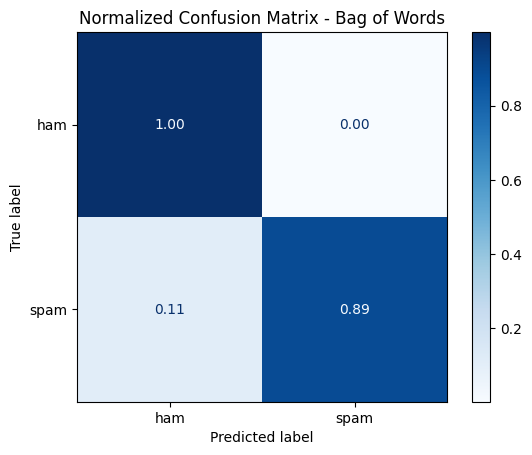

In [45]:

results = {}

# BOW vectorizer

bow_vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")
x_train_bow = bow_vectorizer.fit_transform(x_train)
x_test_bow = bow_vectorizer.transform(x_test)

# SVM Classifier

clf_bow = LinearSVC()
clf_bow.fit(x_train_bow, y_train)
pred_bow = clf_bow.predict(x_test_bow)


# Accuracy

results["Bag of Words"] = accuracy_score(y_test, pred_bow)

# Normalized Confusion Matrix
cm_bow = confusion_matrix(y_test, pred_bow, normalize='true')  # Normalize by true labels (rows)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bow, display_labels=clf_bow.classes_)

# Plot
disp.plot(cmap='Blues', values_format=".2f")  # Format values to 2 decimals
plt.title("Normalized Confusion Matrix - Bag of Words")
plt.show()

In [46]:
results["Bag of Words"]

0.9838565022421525

## N-gram (Unigram + bigram + trigram)

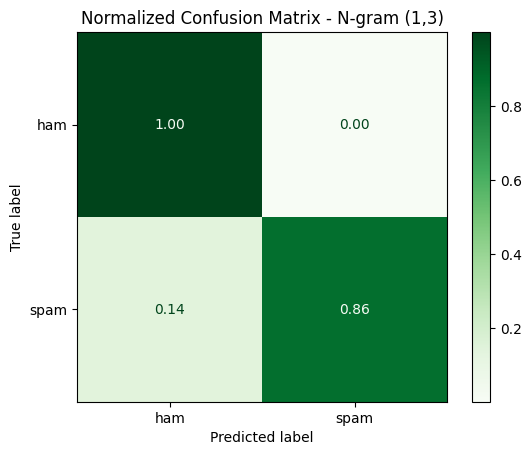

In [47]:
# N-gram Vectorizer (Unigram + Bigram + Trigram)

ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r"(?u)\b\w+\b")
x_train_ngram = ngram_vectorizer.fit_transform(x_train)
x_test_ngram = ngram_vectorizer.transform(x_test)

# Naive Bayes Classifier
clf_ngram = LinearSVC()
clf_ngram.fit(x_train_ngram, y_train)
pred_ngram = clf_ngram.predict(x_test_ngram)

# Accuracy
results["N-gram"] = accuracy_score(y_test, pred_ngram)

# Normalized Confusion Matrix
cm_ngram = confusion_matrix(y_test, pred_ngram, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ngram, display_labels=clf_ngram.classes_)

# Plot
disp.plot(cmap='Greens', values_format=".2f")
plt.title("Normalized Confusion Matrix - N-gram (1,3)")
plt.show()

In [48]:
results["N-gram"]

0.9802690582959641

## TF-IDF

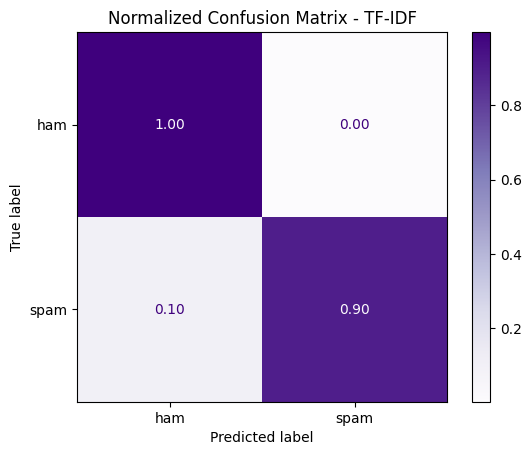

In [49]:

# TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Naive Bayes Classifier

clf_tfidf = LinearSVC()
clf_tfidf.fit(x_train_tfidf, y_train)
pred_tfidf = clf_tfidf.predict(x_test_tfidf)

# Accuracy

results["TF-IDF"] = accuracy_score(y_test, pred_tfidf)

# Normalized Confusion Matrix

cm_tfidf = confusion_matrix(y_test, pred_tfidf, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=clf_tfidf.classes_)

# Plot
disp.plot(cmap='Purples', values_format=".2f")
plt.title("Normalized Confusion Matrix - TF-IDF")
plt.show()

In [50]:
results["TF-IDF"]

0.9838565022421525

## Results comparison

In [51]:
print("Accuracy - Bag of words : ", results["Bag of Words"])
print("Accuracy - N-gram (1,3) : ", results["N-gram"])
print("Accuracy - Tf-IDF       : ", results["TF-IDF"])

Accuracy - Bag of words :  0.9838565022421525
Accuracy - N-gram (1,3) :  0.9802690582959641
Accuracy - Tf-IDF       :  0.9838565022421525
